# Twitter Spam Classification 

### Importing necessary libraries for Exploratory Data Analysis and Model Building

In [2]:
import pandas as pd
import collections
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
import nltk

np.set_printoptions(suppress=True)

%matplotlib inline

In [3]:
from sklearn.metrics import confusion_matrix

### Importing and preparing data

In [4]:
#df_input_prefiltered -> complete dataset with labels
#df_input             -> dataset spam input

df_input_prefiltered = pd.read_csv('spamdata.csv')
df = pd.read_csv('spaminput.csv')

#updating column names to join dataframes on keys
df_input_prefiltered.columns = ['id','label']

#dataframe merge and assign corresponding label
df_input = pd.merge(df, df_input_prefiltered, on=['id'])

### Splitting tabular Data based on Spam/ Ham label 

In [5]:
ham_df = df_input[df_input.label == 0]
spam_df = df_input[df_input.label == 1]

ham_df = ham_df.sample(len(spam_df))
df = pd.concat([ham_df,spam_df])

In [6]:
print("Number of Spam tweets:",len(spam_df),"\n")
print("Number of Ham tweets:",len(ham_df))

Number of Spam tweets: 4457 

Number of Ham tweets: 4457


### Exploring existance of null values 

#### We observe that many features have null values, which need to be removed from the dataset 

In [7]:
df.isnull().sum()

coordinates                   8890
created_at                       0
hashtags                      6574
media                         7344
urls                          4379
favorite_count                   0
id                               0
in_reply_to_screen_name       8015
in_reply_to_status_id         8285
in_reply_to_user_id           8015
lang                             0
place                         8742
possibly_sensitive            3571
retweet_count                    0
reweet_id                     6526
retweet_screen_name           6526
source                          95
text                             0
tweet_url                        0
user_created_at                  0
user_screen_name                 0
user_default_profile_image       0
user_description              2381
user_favourites_count            0
user_followers_count             0
user_friends_count               0
user_listed_count                0
user_location                 3639
user_name           

### Removing unnecessary labels

In [8]:
print("\nNumber of tweets with null coordinates:",df.coordinates.isnull().sum(),"\nHence, we remove this feature.")

del df['coordinates']


Number of tweets with null coordinates: 8890 
Hence, we remove this feature.


### Splitting tweet created time & suer created time 

In [9]:
print(df.created_at.head(1))
print("\nWe split tweets time stamp into Day, Month, Date, Hour, Min, Sec, Year\n")

30716    Tue May 17 14:30:11 +0000 2016
Name: created_at, dtype: object

We split tweets time stamp into Day, Month, Date, Hour, Min, Sec, Year



In [10]:
df['tweet_day'] = df.created_at.str.split(" ").str[0]
df['tweet_month'] = df.created_at.str.split(" ").str[1]
df['tweet_date'] = df.created_at.str.split(" ").str[2]
df['tweet_time'] = df.created_at.str.split(" ").str[3]
df['tweet_year'] = df.created_at.str.split(" ").str[5]
df = df.reset_index(drop=True)

df.drop(df.index[df[df.lang == 'in'].index[0]],inplace=True)

In [11]:
df['acc_created_day'] = df.user_created_at.str.split(" ").str[0]
df['acc_created_month'] = df.user_created_at.str.split(" ").str[1]
df['acc_created_date'] = df.user_created_at.str.split(" ").str[2]
df['acc_created_time'] = df.user_created_at.str.split(" ").str[3]
df['acc_created_year'] = df.user_created_at.str.split(" ").str[5]

## Extracting Features

### has_hashtag is a binary variable. If the tweet was posted along with a hashtag, has_hastag = 1, else 0 
### num_hashtag is a continous variable. If takes the value corresponding to number of hashtags included in a tweet.

In [12]:
#HASHTAGS FEATURES

df['hashtags']=df['hashtags'].fillna(0)

has_hashtags = []
num_hashtags = []

for i in range(0,len(df)):
    if(df.hashtags.iloc[i] == 0):
        has_hashtags.append(0)
        num_hashtags.append(0)
    else:
        has_hashtags.append(1)
        num_hashtags.append(len(df.hashtags.iloc[i].split(" ")))
    
df['has_hashtags'] = has_hashtags
df['num_hashtags'] = num_hashtags

### has_media is a binary variable. If the tweet was posted along with a media link, has_media = 1, else 0

In [13]:
#MEDIA 

df['media'] = df['media'].fillna(0)

has_media = []

for i in range(0,len(df)):
    if(df.media.iloc[i] == 0):
        has_media.append(0)
    else:
        has_media.append(1)

df['has_media'] = has_media

### has_urls is a binary variable. If the tweet consists a url link, has_url = 1, else 0 

In [14]:
#URLS

df['urls'] = df['urls'].fillna(0)

has_urls = []

for i in range(0,len(df)):
    if(df.urls.iloc[i] == 0):
        has_urls.append(0)
    else:
        has_urls.append(1)

df['has_urls'] = has_urls

### has_favorite_count is a binary variable. If the posted tweet contains a favourtie count, 
### has_favorite_count = 1, else 0 

In [15]:
#favorite_count

has_favorite_count = []

for i in range(0,len(df)):
    if(df.favorite_count.iloc[i] == 0):
        has_favorite_count.append(0)
    else:
        has_favorite_count.append(1)

df['has_favorite_count'] = has_favorite_count

### Deleteing language label as all the posted tweets are in English 

In [16]:
#lang, as they are all en, we can drop them

del df['lang']

### has_place is a binary variable. If the posted tweet contains location details along with it, has_place = 1, else 0

In [17]:
#place

has_place = []

df['place'] = df['place'].fillna(0)

for i in range(0,len(df)):
    if(df.place.iloc[i] == 0):
        has_place.append(0)
    else:
        has_place.append(1)
    
df['has_place'] = has_place

###  has_retweet_count is a binary variable. If the posted tweet contains retweet count, 
### has_retweet_count = 1, else 0

In [18]:
#retweet_count

has_retweet_count = []

for i in range(0,len(df)):
    if(df.retweet_count.iloc[i] == 0):
        has_retweet_count.append(0)
    else:
        has_retweet_count.append(1)
    
df['has_retweet_count'] = has_retweet_count

### is_RT is a binary variable. If the tweet id is a retweet of another tweet, is_RT = 1, else 0

In [19]:
is_RT = []

for i in range(0,len(df)):
    if(df.text.iloc[i][:2] == "RT"):
        is_RT.append(1)
    else:
        is_RT.append(0)
        
df['is_RT'] = is_RT

### Similarly, we check if a posted tweet has user description, has a follower count, has a user name, and is verified.

### All the corresponding values = 1, if the labels exist, else 0

In [20]:
df['has_user_description']=df.user_description.apply( lambda x: 0 if pd.isnull(x) else 1)
df['has_user_followers_count']=df.user_followers_count.apply( lambda x: 0 if pd.isnull(x) else 1)
df['has_user_listed_count']=df.user_listed_count.apply( lambda x: 0 if pd.isnull(x) else 1)
df['has_user_name']=df.user_name.apply( lambda x: 0 if pd.isnull(x) else 1)
df['is_user_verfied']= df.user_verified.apply(lambda x: 1 if x is True else 0 )

### f_ratio: The ratio of followers to following of a person, which is important in analysis Spam/ Ham tweets

In [21]:
df['f_ratio'] = (df['user_followers_count']+1)/(df['user_followers_count']+1 + df['user_friends_count']+1)

### length is a continuous variable, corresponding to number of words in a given tweet 

In [22]:
length = []
for i in range(0,len(df)):
    length.append(len(df.iloc[i].text))
df['length'] = length

###  DIGITS is a continuous variable, corresponds to number of digits in a given tweet

In [23]:
digits_list = []

for i in range(0,len(df)):
    if(sum(c.isdigit() for c in df.text.iloc[i]) == 0):
        digits_list.append(0)
    else:
        digits_list.append(sum(c.isdigit() for c in df.text.iloc[i]))

digits_col = pd.Series(digits_list)
df['DIGITS'] = digits_col.values

### CAP is a continuous variable, coreesponds to number of capitalized words in a given tweet.

In [24]:
cap_list = []

for i in range(0,len(df)):
    words = df.text.iloc[i].split()
    count = 0
    for j in range(0,len(words)):
        if(words[j].isupper()):
            count = count + 1;
    cap_list.append(count)    
    #print(cap_list)
        
cap_col = pd.Series(cap_list)
df['CAP'] = cap_col.values

## Exploratory Data Analysis 

### First, we  take a look at the difference between the tweets corresponding to Spam & Ham. We create new feaures called filtered_text and filtered_text_lower. 

### filtered_text contains the text of every corresponding tweet, filtered by the nltk stopwords.

### filtered_text_lower contains tokens after converting the filtered_text to lower case

In [25]:
from nltk.corpus import stopwords
filtered_text = []

for i in range(0,len(df)):
    word_list = str(df.text.iloc[i]).split()
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    filtered_text.append(' '.join(filtered_words))
df['filtered_text'] = filtered_text
df['filtered_text_lower'] = df['filtered_text'].str.lower()

In [26]:
df.columns

Index(['created_at', 'hashtags', 'media', 'urls', 'favorite_count', 'id',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'place', 'possibly_sensitive', 'retweet_count',
       'reweet_id', 'retweet_screen_name', 'source', 'text', 'tweet_url',
       'user_created_at', 'user_screen_name', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name.1', 'user_statuses_count', 'user_time_zone',
       'user_urls', 'user_verified', 'label', 'tweet_day', 'tweet_month',
       'tweet_date', 'tweet_time', 'tweet_year', 'acc_created_day',
       'acc_created_month', 'acc_created_date', 'acc_created_time',
       'acc_created_year', 'has_hashtags', 'num_hashtags', 'has_media',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_follow

### Word Frequencies 

In [27]:
spam_text = []
spam_df = df[df.label==1]

for i in range(0,len(spam_df)):
    spam_text.append(spam_df.filtered_text.iloc[i])
    
ham_text = []
ham_df = df[df.label==0]

for i in range(0,len(ham_df)):
    ham_text.append(ham_df.filtered_text.iloc[i])


Below is the plot of 50 most commonly used words in SPAM comment


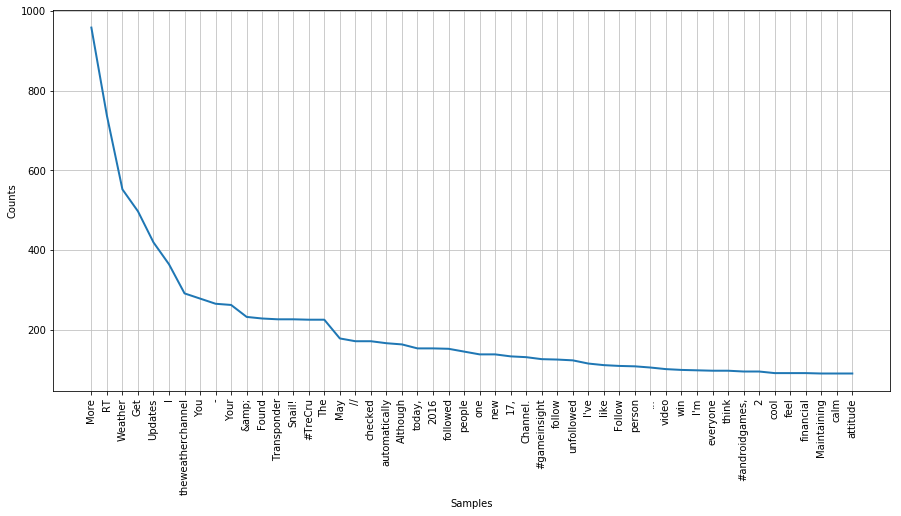


Below is the plot of 50 most commonly used words in HAM comment


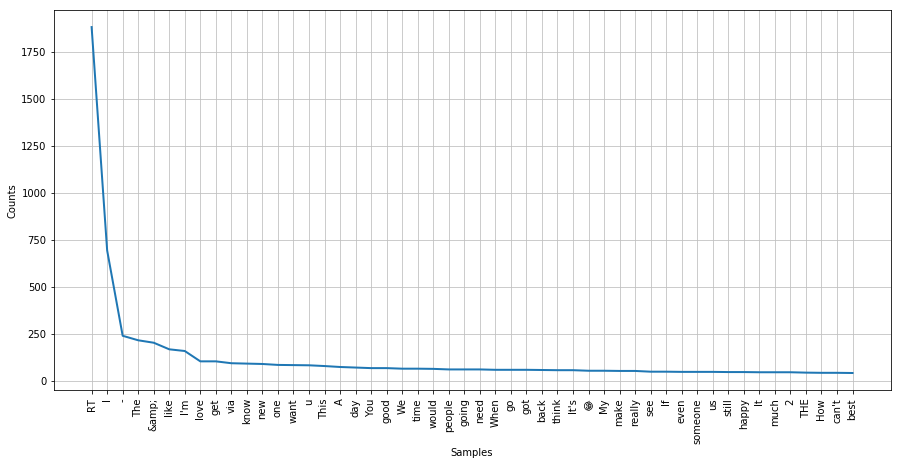

In [28]:
spam_text = ' '.join(spam_text).split()
freq = nltk.FreqDist(spam_text)

print("\nBelow is the plot of 50 most commonly used words in SPAM comment")
plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)

ham_text = ' '.join(ham_text).split()
freq = nltk.FreqDist(ham_text)
print("\nBelow is the plot of 50 most commonly used words in HAM comment")

plt.figure(figsize=(15,7))
freq.most_common(50)
freq.plot(50)

### Function to return ngram words 

from itertools import combinations
from collections import Counter

def ngram(lines,i):
    pair_counter = Counter()
    for line in lines:
        unique_tokens = sorted(set(line))  
        combos = combinations(unique_tokens, i)
        pair_counter += Counter(combos)
    return pair_counter

### Applying 1-gram, bi-gram and tri-gram models on Spam corpus 

spam_df = df[df.label==1]
ham_df = df[df.label==0]

lines = []
for i in range(0,len(spam_df)):
    tokens = spam_df.filtered_text_lower.iloc[i].split()
    lines.append(tokens)

one_gram_spam = ngram(lines,1)
bi_gram_spam = ngram(lines,2)
tri_gram_spam = ngram(lines,3)

### Applying 1-gram, bi-gram and tri-gram models on Ham corpus 

lines = []
for i in range(0,len(ham_df)):
    tokens = ham_df.filtered_text_lower.iloc[i].split()
    lines.append(tokens)
    
one_gram_ham = ngram(lines,1)
bi_gram_ham = ngram(lines,2)
tri_gram_ham = ngram(lines,3)

### Top 25 word occurances in Spam tweets (1-gram, bi-gram & tri-gram models) 

one_gram_spam.most_common(20)

bi_gram_spam.most_common(20)

tri_gram_spam.most_common(20)

### Top 25 word occurances in Ham tweets (1-gram, bi-gram & tri-gram models)

one_gram_ham.most_common(20)

bi_gram_ham.most_common(20)

tri_gram_ham.most_common(20)

### Word Clouds for Spam corpus

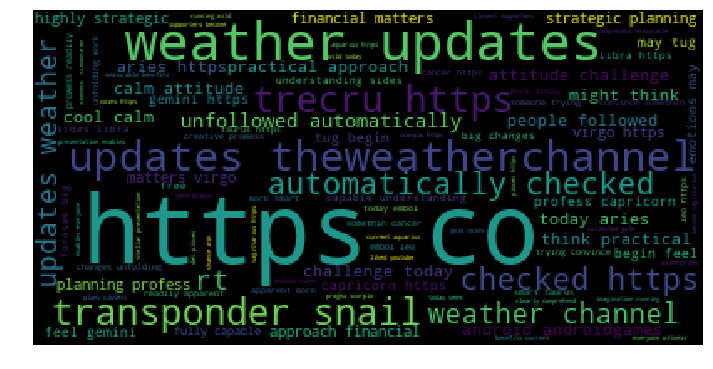

In [29]:
text = ''
for i in range(0,len(spam_df)):
    text = text + str(spam_df.filtered_text_lower.iloc[i])
    
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Clouds for Ham corpus 

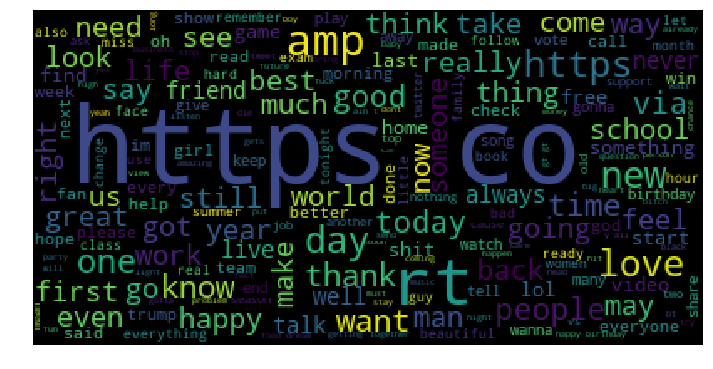

In [30]:
text = ''
for i in range(0,len(ham_df)):
    text = text + str(ham_df.filtered_text_lower.iloc[i])
    
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentimental Analysis of each tweet 
and how the sentiment changes in spam and ham

## Polarity vs Objectivity

Sentiment Analysis: the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [31]:
from textblob import TextBlob

polarity=[]
subjectivity=[]
sentiment_flag=[]
subjectivity_flag=[]
for i in df.filtered_text_lower:
    testimonial = TextBlob(i).sentiment
    polarity.append(testimonial.polarity)
    subjectivity.append(testimonial.subjectivity)
    
    if testimonial.polarity>0.33:
        sentiment_flag.append('positive')
    elif testimonial.polarity<-0.33:
        sentiment_flag.append('negative')
    else:
        sentiment_flag.append('neutral')
        
    if testimonial.subjectivity>0.66:
        subjectivity_flag.append('subjective')
    elif testimonial.subjectivity<0.33:
        subjectivity_flag.append('objective')
    else:
        subjectivity_flag.append('neutral')
            

            
print("The polarity score is a float within the range [-1.0, 1.0]. \nThe subjectivity is a float within the range [0.0, 1.0] \nwhere 0.0 is very objective and 1.0 is very subjective.")            
df['polarity']=pd.Series(polarity)
df['subjectivity']=pd.Series(subjectivity)
df['sentiment_flag']=pd.Series(sentiment_flag)
df['subjectivity_flag']=pd.Series(subjectivity_flag)
df[['polarity','subjectivity','sentiment_flag','subjectivity_flag']].head()

The polarity score is a float within the range [-1.0, 1.0]. 
The subjectivity is a float within the range [0.0, 1.0] 
where 0.0 is very objective and 1.0 is very subjective.


,polarity,subjectivity,sentiment_flag,subjectivity_flag
0,0.00,0.000000,neutral,objective
1,0.00,0.066667,neutral,objective
2,-0.21,0.180000,neutral,objective
3,-0.20,0.600000,neutral,neutral
4,0.70,0.600000,positive,neutral


## Polarity and Subjectivity in Spam and Ham

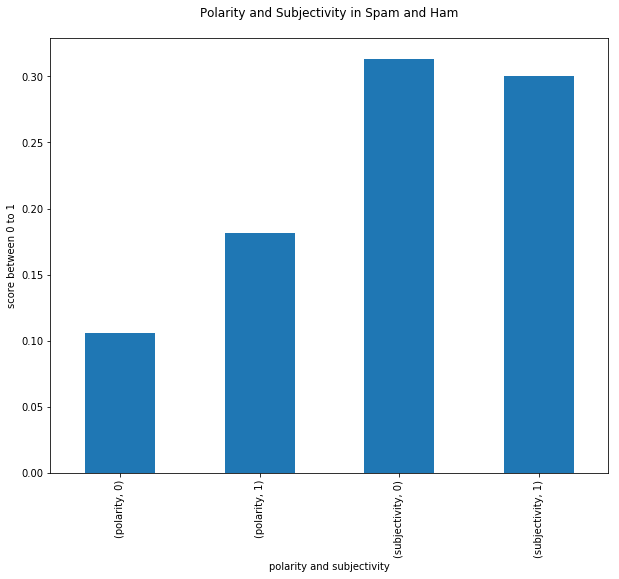

In [32]:
plt.figure(figsize=(10,8))
res=df.groupby(['label'])['polarity','subjectivity'].mean()
res.unstack(level=0).plot(kind='bar')
plt.ylabel("score between 0 to 1")
plt.xlabel("polarity and subjectivity")
plt.title("Polarity and Subjectivity in Spam and Ham\n")
plt.show()

## Sentiment in Spam and Ham

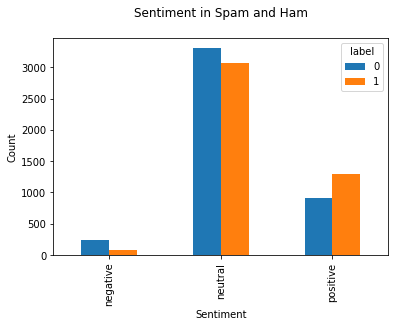

In [33]:
plt.figure(figsize=(10,8))
res= df.groupby(['label','sentiment_flag'])['filtered_text_lower'].count()
res.unstack(level=0).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.title("Sentiment in Spam and Ham\n")
plt.show()

## Subjectivity in Spam and Ham

D:\Anacondainstallationfolder\lib\site-packages\pandas\plotting\_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


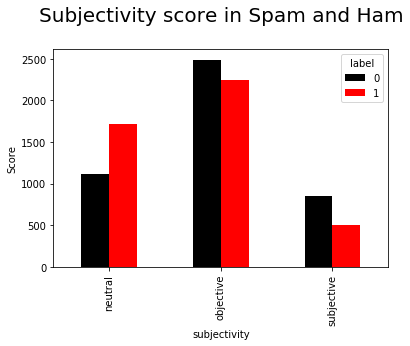

In [34]:
plt.figure(figsize=(10,8))
res= df.groupby(['label','subjectivity_flag'])['filtered_text_lower'].count()
res.unstack(level=0).plot(kind='bar',colors=['black','red'])
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.ylabel("Score")
plt.xlabel("subjectivity")
plt.title("Subjectivity score in Spam and Ham\n")
plt.show()

## Subjectivity and Polarity in Spam and Ham

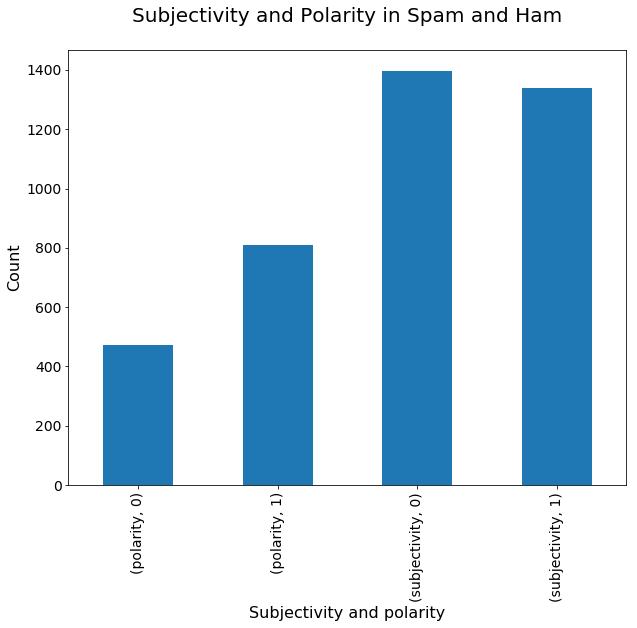

In [35]:
plt.figure(figsize=(10,8))
res= df.groupby(['label'])['polarity','subjectivity'].sum()
res.unstack(level=0).plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Subjectivity and polarity")
plt.title("Subjectivity and Polarity in Spam and Ham\n")
plt.show()

## Distribution of Polarity value in ham and spam

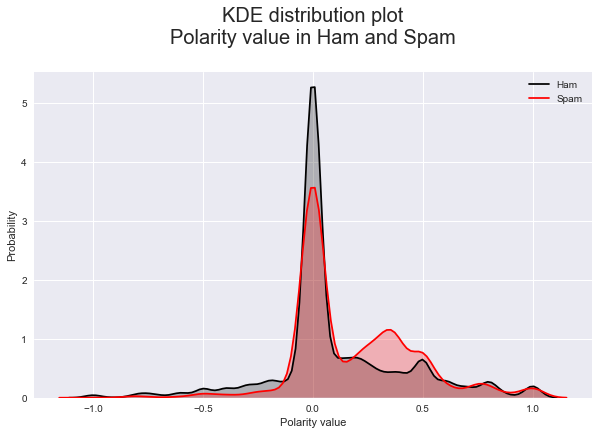

In [36]:
import seaborn as sns


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})
res=[x for x in list(df[df.label==0].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Ham",color='black');
res=[x for x in list(df[df.label==1].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Spam",color='red');

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)



plt.title("KDE distribution plot\nPolarity value in Ham and Spam\n")
plt.xlabel("Polarity value")
plt.ylabel("Probability")
plt.show()

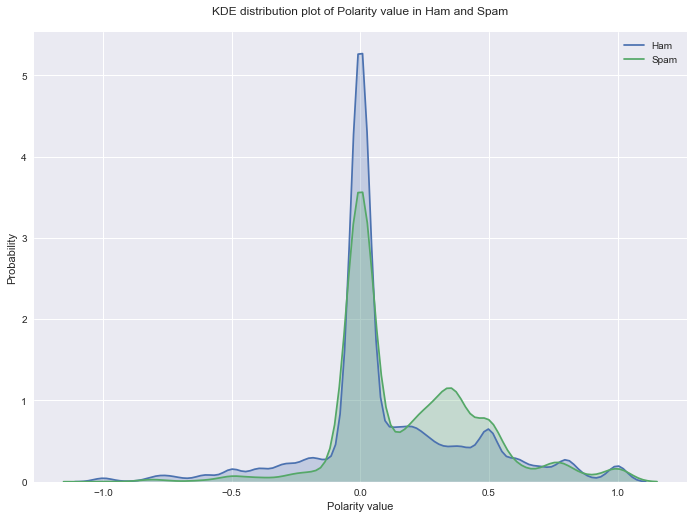

In [37]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
res=[x for x in list(df[df.label==0].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Ham");
res=[x for x in list(df[df.label==1].polarity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Spam");
plt.title("KDE distribution plot of Polarity value in Ham and Spam\n")
plt.xlabel("Polarity value")
plt.ylabel("Probability")
plt.show()

## Distribution of Subjectivity value in ham and spam

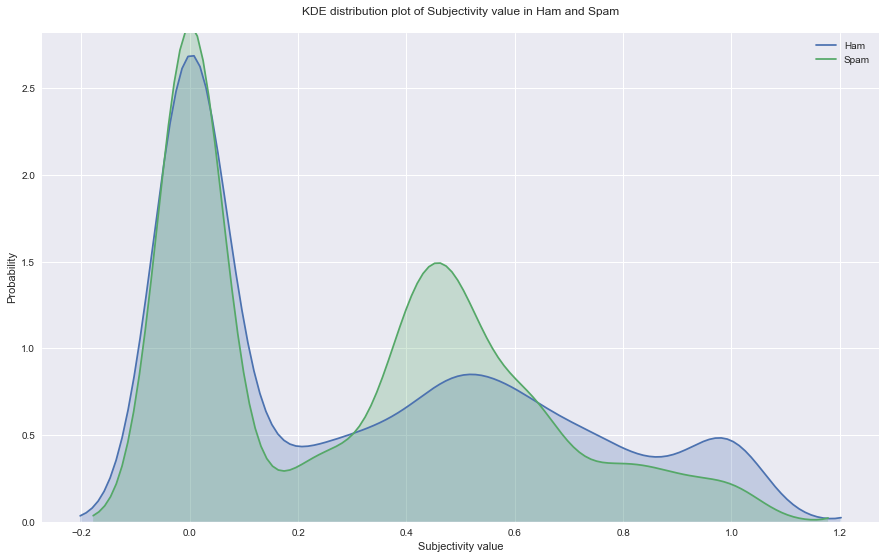

In [38]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,9)})
res=[x for x in list(df[df.label==0].subjectivity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Ham");
res=[x for x in list(df[df.label==1].subjectivity) if str(x) != 'nan']
#sns.distplot(res)
sns.kdeplot(res, shade=True,label="Spam");
plt.title("KDE distribution plot of Subjectivity value in Ham and Spam\n")
plt.xlabel("Subjectivity value")
plt.ylabel("Probability")
plt.show()

## Top words in positive sentiment spam tweet

In [39]:
text_corpus= ''
import string 

for i in df[df.label==1][df.sentiment_flag=='positive']['filtered_text_lower']:
    text_corpus += i
    
allWords = nltk.tokenize.word_tokenize(text_corpus)
allWordDist = nltk.FreqDist(w.lower() for w in allWords if w not in list(string.punctuation))

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords )
print("Top words in positive sentiment spam tweets")
allWordDist.most_common(10)

D:\Anacondainstallationfolder\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Top words in positive sentiment spam tweets


[('https', 1296),
 ('...', 490),
 ('more', 464),
 ('today', 154),
 ('win', 154),
 ('amp', 129),
 ('rt', 125),
 ('follow', 123),
 ('may', 96),
 ('a', 85)]

## Top words in negative sentiment spam tweets

In [40]:
text_corpus= ''
for i in df[df.label==1][df.sentiment_flag=='negative']['filtered_text_lower']:
    text_corpus += i
    
allWords = nltk.tokenize.word_tokenize(text_corpus)
allWordDist = nltk.FreqDist(w.lower() for w in allWords if w not in list(string.punctuation))

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords )
print("Top words in negative sentiment spam tweets")
allWordDist.most_common(10)

Top words in negative sentiment spam tweets


D:\Anacondainstallationfolder\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[('https', 115),
 ("'s", 31),
 ('transponder', 20),
 ('snail', 20),
 ('trecru', 20),
 ('lt', 20),
 ('3', 19),
 ('inside', 18),
 ('secret', 14),
 ('...', 13)]

## Top words in neutral sentiment spam tweets

In [41]:


text_corpus= ''
for i in df[df.label==1][df.sentiment_flag=='neutral']['filtered_text_lower']:
    text_corpus += i
    
allWords = nltk.tokenize.word_tokenize(text_corpus)
allWordDist = nltk.FreqDist(w.lower() for w in allWords if w not in list(string.punctuation))

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords )
print("Top words in neutral sentiment spam tweets")
allWordDist.most_common(10)



D:\Anacondainstallationfolder\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Top words in neutral sentiment spam tweets


[('https', 2636),
 ('...', 609),
 ('more', 493),
 ('weather', 492),
 ('updates', 368),
 ('theweatherchannel', 251),
 ('i', 250),
 ('the', 178),
 ('may', 165),
 ('today', 162)]

# Feature Selection 

In [42]:
df.columns

Index(['created_at', 'hashtags', 'media', 'urls', 'favorite_count', 'id',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'place', 'possibly_sensitive', 'retweet_count',
       'reweet_id', 'retweet_screen_name', 'source', 'text', 'tweet_url',
       'user_created_at', 'user_screen_name', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name.1', 'user_statuses_count', 'user_time_zone',
       'user_urls', 'user_verified', 'label', 'tweet_day', 'tweet_month',
       'tweet_date', 'tweet_time', 'tweet_year', 'acc_created_day',
       'acc_created_month', 'acc_created_date', 'acc_created_time',
       'acc_created_year', 'has_hashtags', 'num_hashtags', 'has_media',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_follow

# Summary Statistics

In [43]:
df[['f_ratio','length', 'DIGITS', 'CAP','num_hashtags','user_favourites_count','user_listed_count']].describe()

,f_ratio,length,DIGITS,CAP,num_hashtags,user_favourites_count,user_listed_count
count,8913.000000,8913.000000,8913.000000,8913.000000,8913.000000,8913.000000,8913.000000
mean,0.528707,94.026590,2.784136,0.953214,0.531022,10159.526198,86.580276
std,0.249614,36.100076,3.667796,1.723201,1.194583,29630.698550,559.764089
min,0.001689,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343434,62.000000,0.000000,0.000000,0.000000,8.000000,1.000000
50%,0.520000,102.000000,2.000000,0.000000,0.000000,904.000000,5.000000
75%,0.687500,128.000000,4.000000,1.000000,1.000000,7375.000000,30.000000
max,0.999993,188.000000,51.000000,25.000000,13.000000,643739.000000,25408.000000


### We conduct a series of hypothesis tests we include features which show statistical significance between Ham and Spam classes

In [44]:
from scipy import stats
np.set_printoptions(suppress=True)

print("t tests for continuous variables")

list_continous_variables=['f_ratio','length', 'DIGITS', 'CAP','num_hashtags','user_favourites_count']

for i in list_continous_variables:
    print("\nVariable name:",i)
    test = stats.ttest_ind(df[i],df['label'], equal_var = False)
    #print(test)
    if test.pvalue<0.05:
        print("The variable",i,"is significant, with a t-stat of",test.statistic)
    else:
        print("The variable",i,"is not significant")

t tests for continuous variables

Variable name: f_ratio
The variable f_ratio is significant, with a t-stat of 4.85892661812

Variable name: length
The variable length is significant, with a t-stat of 244.566820514

Variable name: DIGITS
The variable DIGITS is significant, with a t-stat of 58.2559902144

Variable name: CAP
The variable CAP is significant, with a t-stat of 23.8494602402

Variable name: num_hashtags
The variable num_hashtags is significant, with a t-stat of 2.26565638193

Variable name: user_favourites_count
The variable user_favourites_count is significant, with a t-stat of 32.3684680707


In [45]:
df = df[['label','has_hashtags', 'num_hashtags', 'has_media','user_favourites_count',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_followers_count',
       'has_user_listed_count', 'has_user_name', 'is_user_verfied', 'f_ratio',
       'length', 'DIGITS', 'CAP', 'filtered_text', 'filtered_text_lower','user_listed_count']]

## We plot distribution plots for continuous variables 

### Distribution plot for number of digits that occured in a tweet, based on Spam/ Ham label

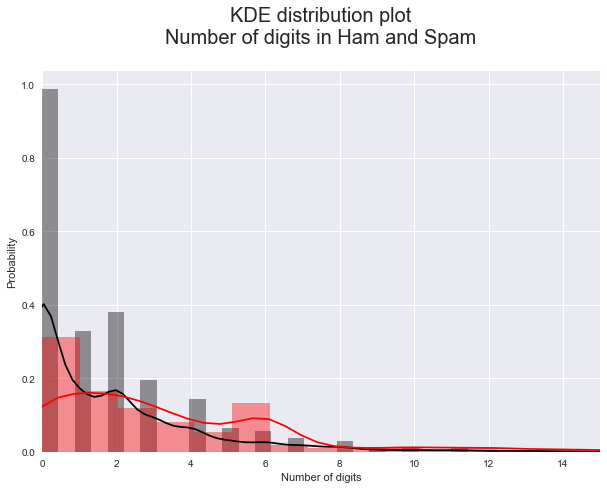

In [46]:
plt.figure(figsize=(10,7))
sns.distplot(df[df.label==0].DIGITS,color="black",kde=True,label="Ham");
sns.distplot(df[df.label==1].DIGITS,color="red",kde=True,label="Spam");
plt.xlim(0,15)

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)



plt.title("KDE distribution plot\nNumber of digits in Ham and Spam\n")
plt.xlabel("Number of digits")
plt.ylabel("Probability")
plt.show()

plt.show()

### Distribution plot for number of capitalized words that occured in a tweet, based on Spam/ Ham label 

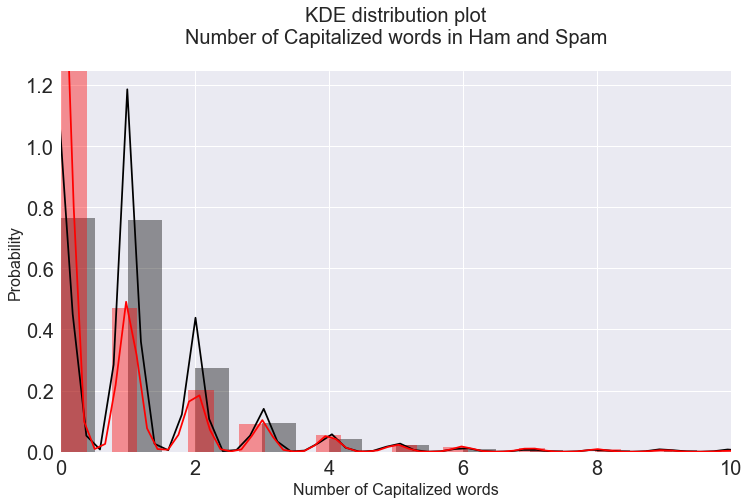

In [47]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].CAP,color="black",kde=True)
sns.distplot(df[df.label==1].CAP,color="red",kde=True)
plt.xlim(0,10)

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)



plt.title("KDE distribution plot\nNumber of Capitalized words in Ham and Spam\n")
plt.xlabel("Number of Capitalized words")
plt.ylabel("Probability")
plt.show()

plt.show()

plt.show()

###  Distribution plot for f_ratio of a user, based on Spam/ Ham label

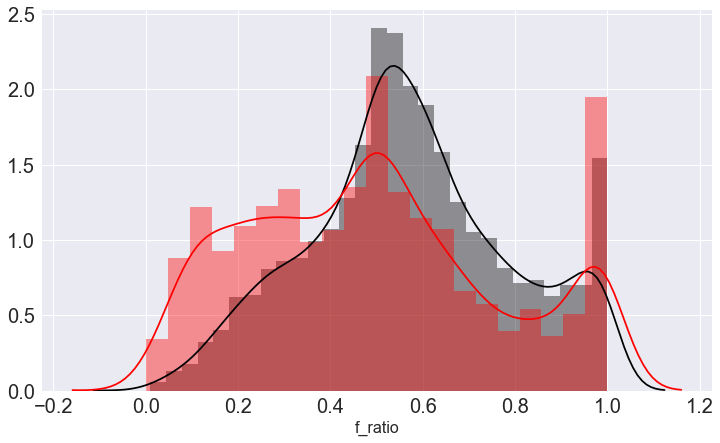

In [48]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].f_ratio,color="black",kde=True)
sns.distplot(df[df.label==1].f_ratio,color="red",kde=True)
plt.show()

### Distribution plot for number of hashtags in a tweet, based on Spam/ Ham labe 

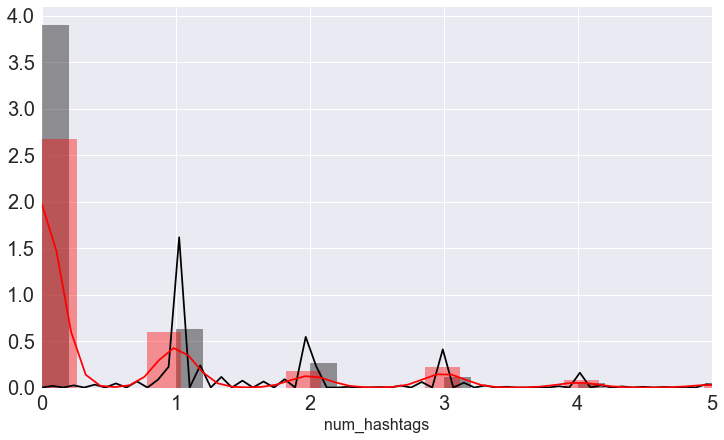

In [49]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].num_hashtags,color="black",kde=True)
sns.distplot(df[df.label==1].num_hashtags,color="red",kde=True)
plt.xlim(0,5)
plt.show()

### Distribution plot for number of times a user liked a tweet, based on Spam/ Ham label

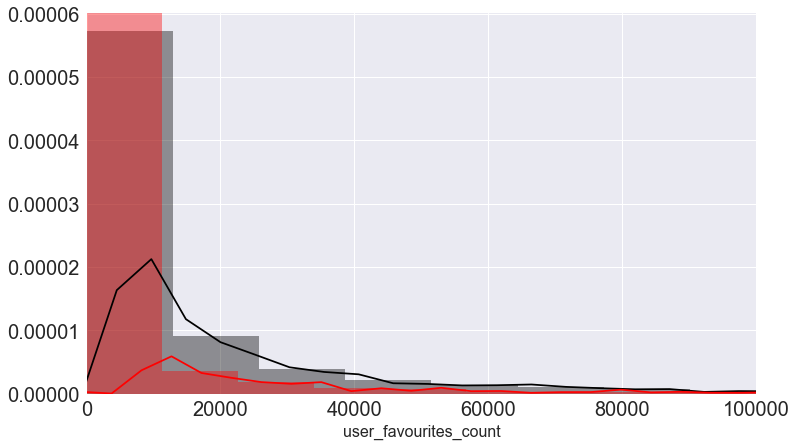

In [50]:
plt.figure(figsize=(12,7))
sns.distplot(df[df.label==0].user_favourites_count,color="black",kde=True)
sns.distplot(df[df.label==1].user_favourites_count,color="red",kde=True)
plt.xlim(0,100000)
plt.show()

### Distribution plot of Length of tweets, based on the Spam or Ham label 

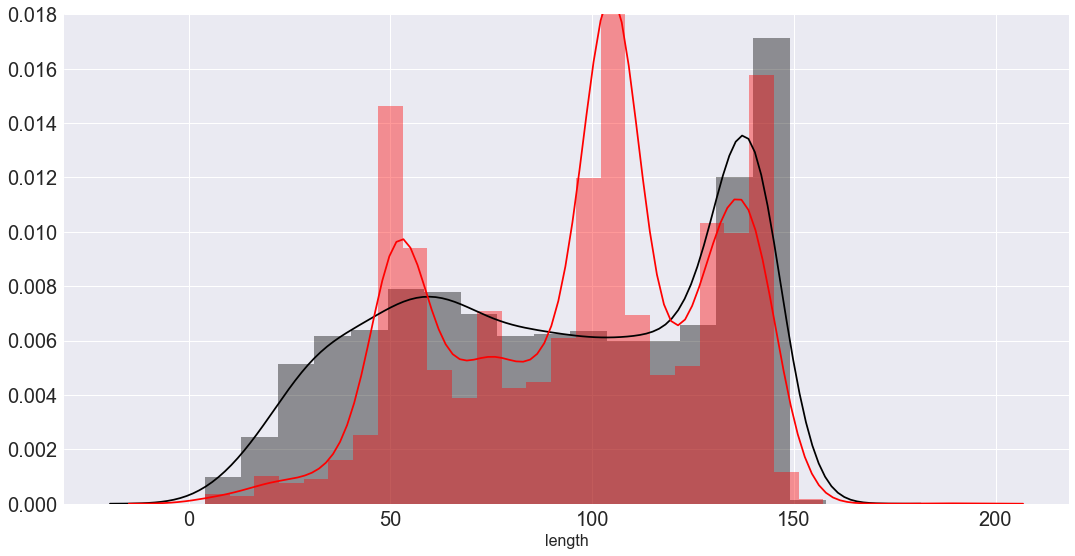

In [51]:
plt.figure(figsize=(18,9))
sns.distplot(df[df.label==0].length,color="black",kde=True)
sns.distplot(df[df.label==1].length,color="red",kde=True)
plt.show()

### Distribution plot of count of number of lists user is mentioned in, based on the Spam or Ham label 

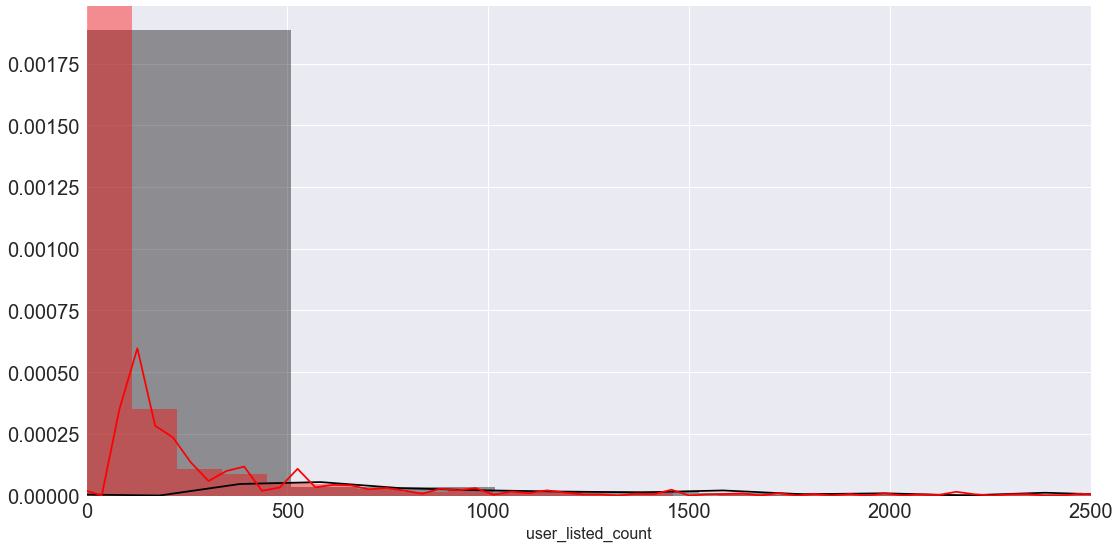

In [52]:
plt.figure(figsize=(18,9))
sns.distplot(df[df.label==0].user_listed_count,color="black",kde=True)
sns.distplot(df[df.label==1].user_listed_count,color="red",kde=True)
plt.xlim(0,2500)
plt.show()

Count plot for ' has_hashtags ' feature, based on Spam/ Ham tweet label


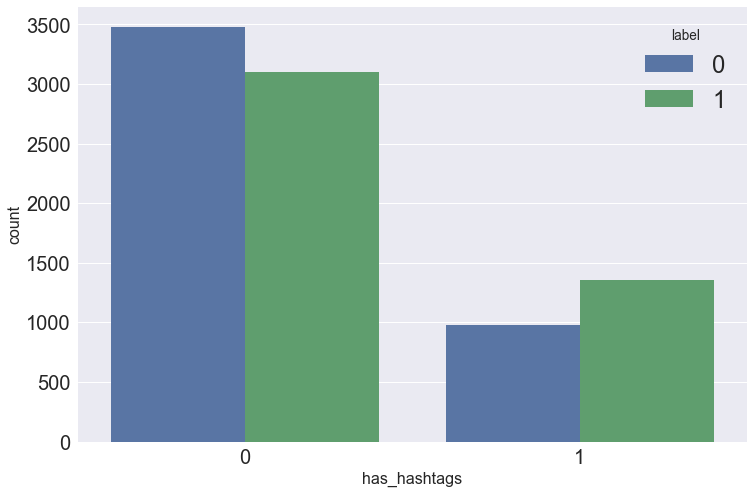



Count plot for ' num_hashtags ' feature, based on Spam/ Ham tweet label


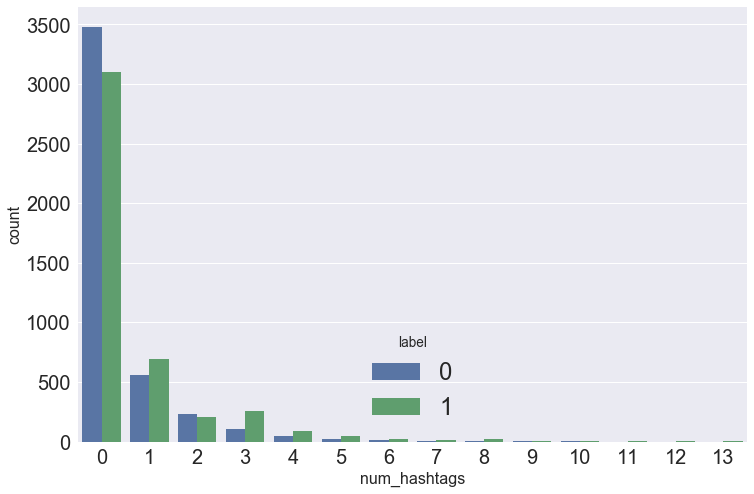



Count plot for ' has_media ' feature, based on Spam/ Ham tweet label


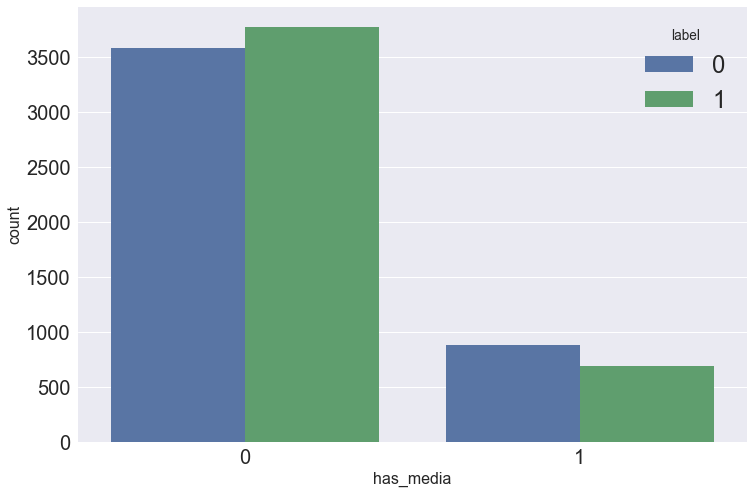



Count plot for ' has_urls ' feature, based on Spam/ Ham tweet label


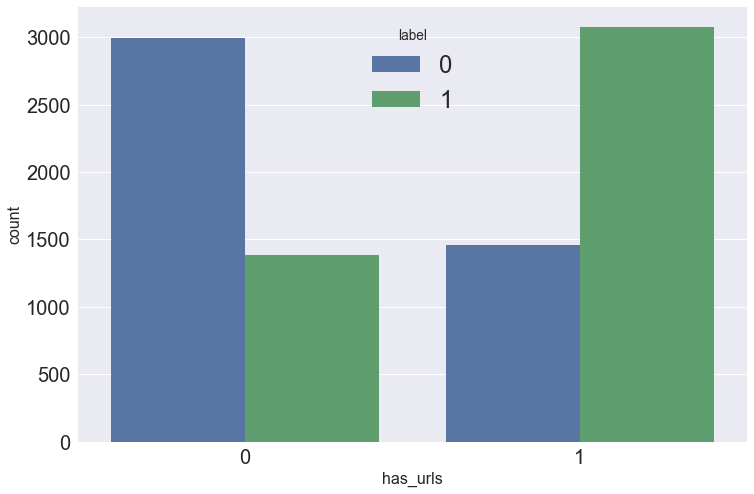



Count plot for ' has_favorite_count ' feature, based on Spam/ Ham tweet label


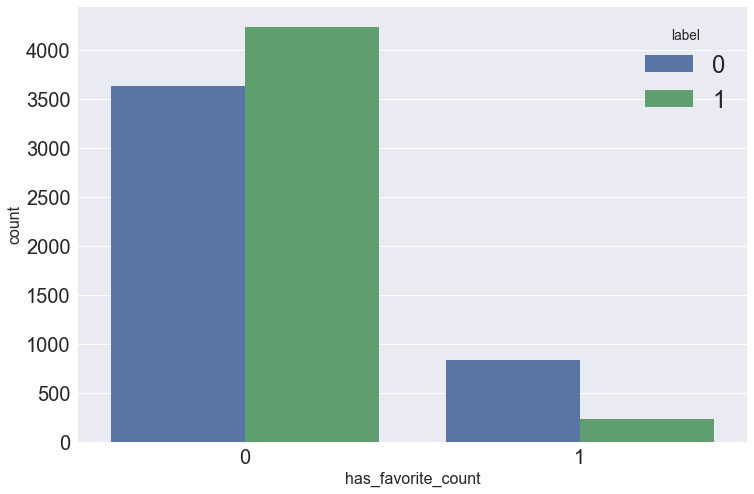



Count plot for ' has_place ' feature, based on Spam/ Ham tweet label


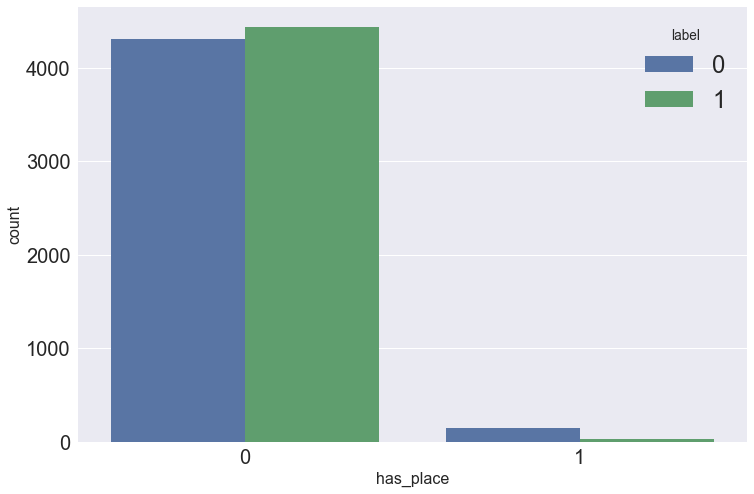



Count plot for ' has_retweet_count ' feature, based on Spam/ Ham tweet label


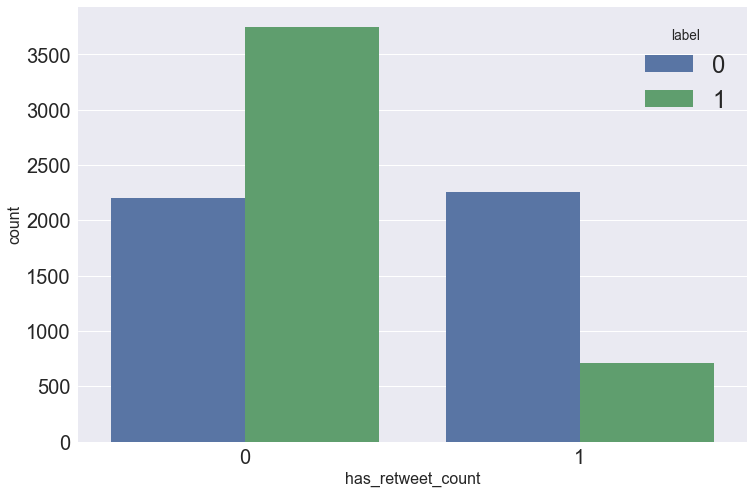



Count plot for ' is_RT ' feature, based on Spam/ Ham tweet label


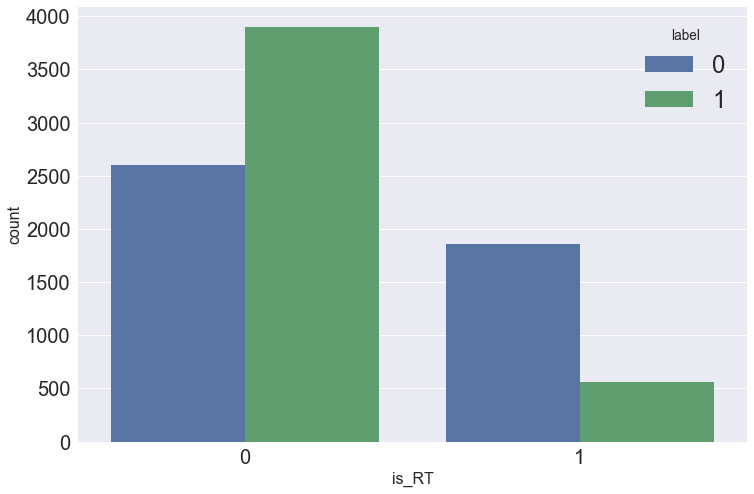



Count plot for ' has_user_description ' feature, based on Spam/ Ham tweet label


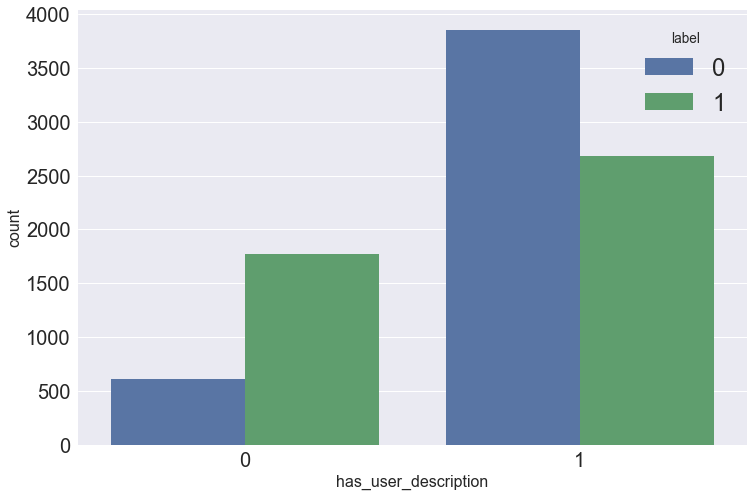



Count plot for ' has_user_name ' feature, based on Spam/ Ham tweet label


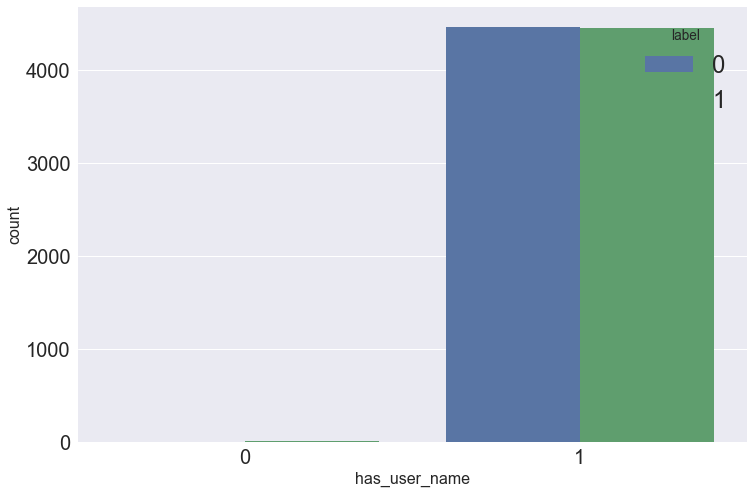



Count plot for ' is_user_verfied ' feature, based on Spam/ Ham tweet label


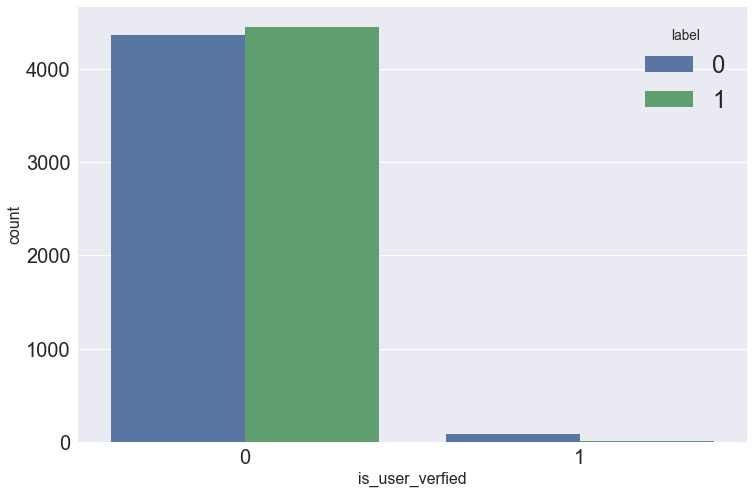



Count plot for ' DIGITS ' feature, based on Spam/ Ham tweet label


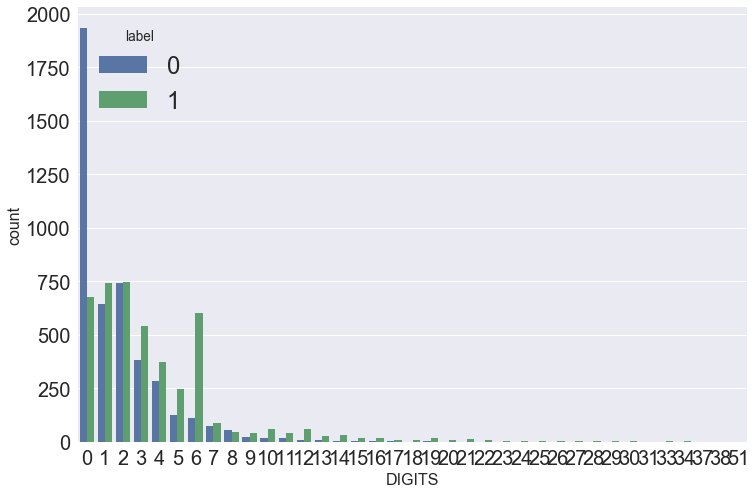



Count plot for ' CAP ' feature, based on Spam/ Ham tweet label


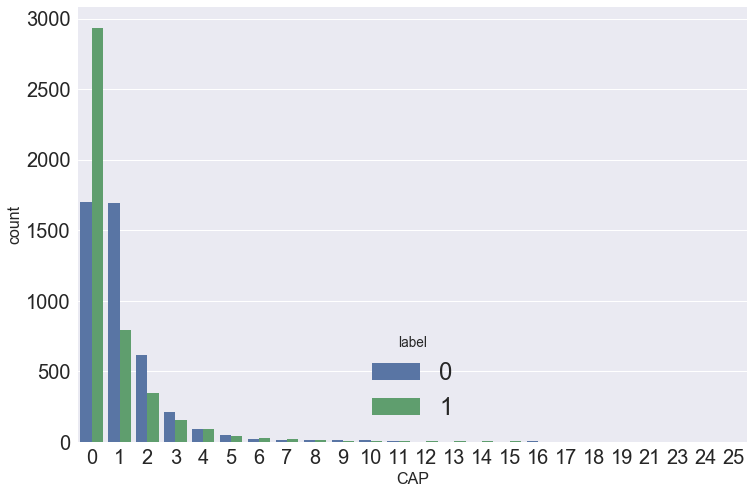

In [53]:
cols = ['label', 'has_hashtags', 'num_hashtags', 'has_media', 'has_urls',
       'has_favorite_count', 'has_place', 'has_retweet_count', 'is_RT',
       'has_user_description',  'has_user_name',
        'is_user_verfied',
        'DIGITS', 'CAP']

for i in range(1,len(cols)):
    plt.figure(figsize=(12,8))
    c = cols[i]
    print("Count plot for","'",cols[i],"' feature, based on Spam/ Ham tweet label")
    sns.countplot(c,hue=df.label,data=df)
    plt.show()
    print("\n")

In [60]:
def comfusion_matrix_properties(mat):


    from sklearn.metrics import confusion_matrix

    mat = confusion_matrix(y_test,ypred)
    print("Confusion Matrix:\n\n",mat,"\n")

    TP = mat[0][0]
    FP = mat[0][1]
    FN = mat[1][0]
    TN = mat[1][1]


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print("True Positive Rate",round(TPR*100,2),"%")

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print("True Negative Rate",round(TNR*100,2),"%")

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print("Positive Predictive Value",round(PPV*100,2),"%")

    # Negative predictive value
    NPV = TN/(TN+FN)
    print("Negative Predictive Value",round(NPV*100,2),"%")

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("False Positive Rate",round(FPR*100,2),"%")

    # False negative rate
    FNR = FN/(TP+FN)
    print("False Negative Rate",round(FNR*100,2),"%")

    # False discovery rate
    FDR = FP/(TP+FP)
    print("False Discovery Rate",round(FDR*100,2),"%")


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Overall Accuracy",round(ACC*100,2),"%")






In [55]:
def roc_curve_plot(input_probabilities,title):
    large = 24

    plt.rc('legend',fontsize=large)
    plt.rc('axes',titlesize = 20)
    plt.rc('axes',labelsize = 16)
    plt.rc('xtick',labelsize = 14)
    plt.rc('ytick',labelsize = 14)
    #plt.set_facecolor('xkcd:white')
    plt.figure(figsize=(12,9))
    y_pred_proba_dt = input_probabilities


    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
    auc = metrics.roc_auc_score(y_test, y_pred_proba_dt)

    dt_model_object={}
    dt_model_object['fpr']=fpr
    dt_model_object['tpr']=tpr
    dt_model_object['auc']=auc

    plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve: \n'+title)
    plt.legend(loc="lower right")
    plt.grid("off")
    plt.show()

# Modelling & Evaluation

## As a base model, we run a Naive Bayes classifier, purely based on tweet text.

In [56]:
NB_df = df[['filtered_text_lower','label']]
NB_df = NB_df.sample(frac=1)

from sklearn.feature_extraction.text import CountVectorizer

vecfinal = CountVectorizer(min_df=50,max_df=0.8,stop_words="english")
finalX = vecfinal.fit_transform(NB_df['filtered_text_lower'])

### Splitting into training and testing data 

In [57]:
split_limit = round(len(NB_df)/2)
X_train = finalX.toarray()[:split_limit]
X_test = finalX.toarray()[split_limit:]
y_train = NB_df.label[:split_limit]
y_test = NB_df.label[split_limit:]

###  Applying Bernoulli Naive Bayes Model

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score

clf_nb = BernoulliNB()
clf_nb.fit(X_train, y_train)
ypred = clf_nb.predict(X_test)
ypred_NB_model=clf_nb.predict(X_test)
accuracy = f1_score(y_test, ypred, average='weighted')
print("Accuracy for this model: ", accuracy*100,"%")

Accuracy for this model:  79.1019283956 %


In [62]:
print("Naive Bayes Model ")
mat = confusion_matrix(y_test,ypred)
comfusion_matrix_properties(mat)

Naive Bayes Model 
Confusion Matrix:

 [[2168   94]
 [ 811 1384]] 

True Positive Rate 72.78 %
True Negative Rate 93.64 %
Positive Predictive Value 95.84 %
Negative Predictive Value 63.05 %
False Positive Rate 6.36 %
False Negative Rate 27.22 %
False Discovery Rate 4.16 %
Overall Accuracy 79.69 %


### Below are the AUC & ROC's of the Bernoulli Naive Bayes model

ROC performance for Naive Bayes is better than the other models

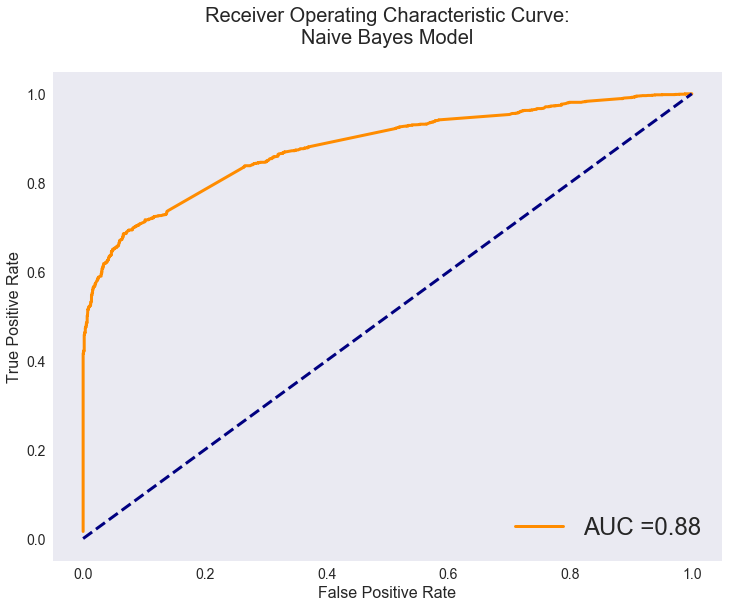

In [64]:
large = 24

from sklearn import metrics
plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn = clf_nb.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

naive_bayes_model_object={}
naive_bayes_model_object['fpr']=fpr
naive_bayes_model_object['tpr']=tpr
naive_bayes_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nNaive Bayes Model\n')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

As we can see from the graph, our ROC curve looks good i.e. for a given FPR the TPR is fairly good enough.

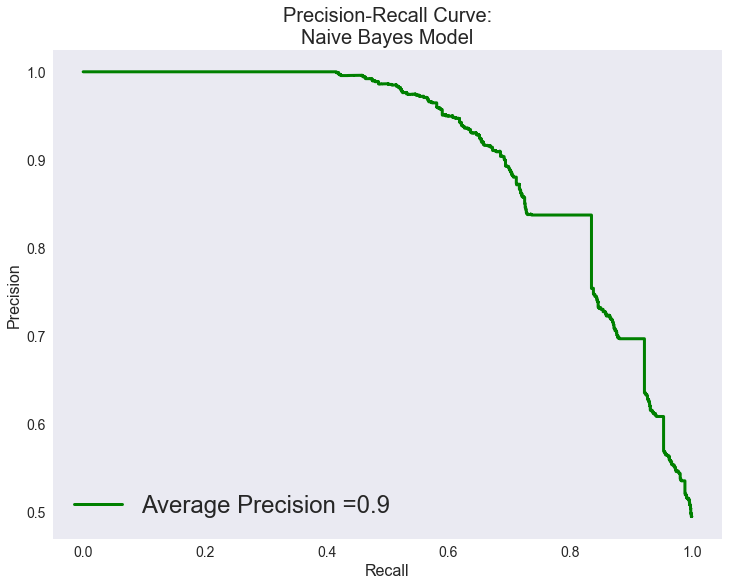

In [67]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


y_pred_proba_nb=clf_nb.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_nb)
average_precision = average_precision_score(y_test, y_pred_proba_nb)

large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

naive_bayes_model_object['recall']=recall
naive_bayes_model_object['precision']=precision
naive_bayes_model_object['average_precision']=average_precision

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nNaive Bayes Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

### Applying Multinomial Naive Bayes Model 

In [68]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
ypred = clf_mnb.predict(X_test)
ypred_MultinomialNB_model=clf_mnb.predict(X_test)
accuracy = f1_score(y_test, ypred, average='weighted')
print("Accuracy for this model: ", accuracy*100,"%")

Accuracy for this model:  72.1917482597 %


In [69]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test,ypred)
print("Confusion Matrix:\n\n",mat,"\n")

Confusion Matrix:

 [[1814  448]
 [ 783 1412]] 



In [70]:
comfusion_matrix_properties(mat)

Confusion Matrix:

 [[1814  448]
 [ 783 1412]] 

True Positive Rate 69.85 %
True Negative Rate 75.91 %
Positive Predictive Value 80.19 %
Negative Predictive Value 64.33 %
False Positive Rate 24.09 %
False Negative Rate 30.15 %
False Discovery Rate 19.81 %
Overall Accuracy 72.38 %


### Below are the AUC & ROC's of the Multinomial Naive Bayes model 

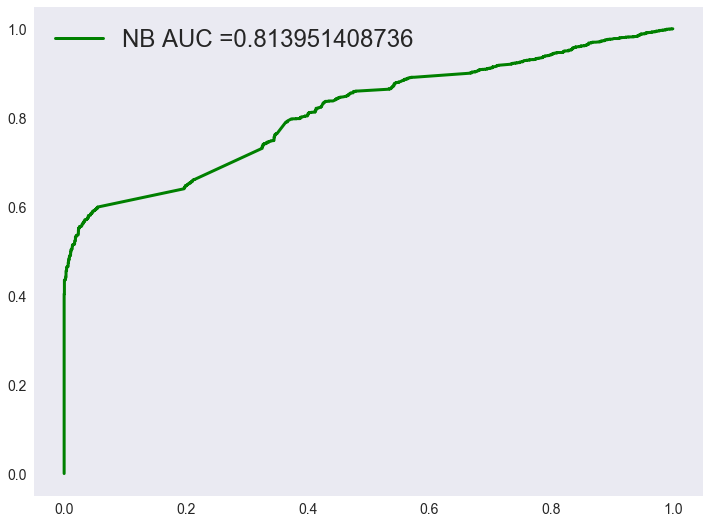

In [71]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(12,9))
y_pred_proba_mnb = clf_mnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_mnb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_mnb)
multinomial_naive_bayes_model_object={}
multinomial_naive_bayes_model_object['fpr']=fpr
multinomial_naive_bayes_model_object['tpr']=tpr
multinomial_naive_bayes_model_object['auc']=auc

plt.plot(fpr,tpr,label="NB AUC ="+str(auc), lw=3,color='green')

plt.legend()
plt.grid()
plt.show()

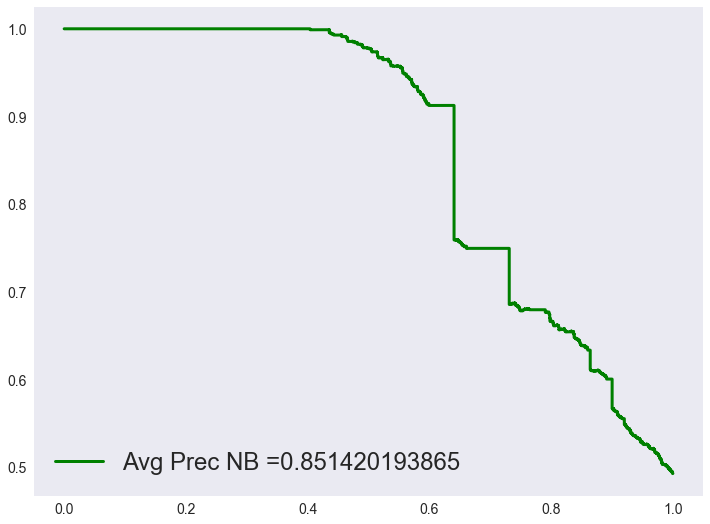

In [72]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_mnb)
average_precisionn = average_precision_score(y_test, y_pred_proba_mnb)
plt.figure(figsize=(12,9))
plt.step(recall, precision, color='green',label="Avg Prec NB ="+str(average_precisionn),lw=3)


plt.legend()
plt.grid()
plt.show()

## Now, we would like to see how the non-text based features work for prediction 

## We subset only necessary features which make sense in this scenario, i.e., features that statistically differentiate between spam and ham tweets.

In [73]:
y = df.label
X = df[['has_hashtags', 'num_hashtags', 'has_media','user_favourites_count',
       'has_urls', 'has_favorite_count', 'has_place', 'has_retweet_count',
       'is_RT', 'has_user_description', 'has_user_followers_count',
       'has_user_listed_count', 'has_user_name', 'is_user_verfied', 'f_ratio',
       'length', 'DIGITS', 'CAP','user_listed_count']]
model = X

### Prediction using Decision Tree Classifier 

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(model, y, test_size = 0.5,random_state=0)

depth = []
training_score = []
testing_score = []

for i in range(1,25):
    clf_dt = DecisionTreeClassifier(criterion = "gini",random_state=0)
    clf_dt.max_depth = i
    clf_dt.fit(X_train, y_train)
    pred_train = clf_dt.predict(X_train)
    #print("Training accuracy, with",i,"depth :",accuracy_score(pred_train,y_train)*100)
    
    pred_test = clf_dt.predict(X_test)
    #print("Testing accuracy, with",i,"depth :",accuracy_score(pred_test,y_test)*100,"\n")
    
    depth.append(i)
    training_score.append(accuracy_score(pred_train,y_train))
    testing_score.append(accuracy_score(pred_test,y_test))

D:\Anacondainstallationfolder\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


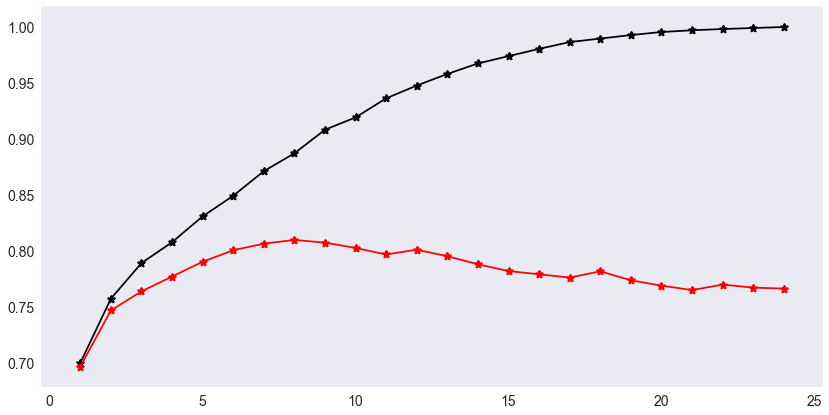

In [75]:
plt.figure(figsize=(14,7))
plt.grid()

plt.plot(depth, training_score,c='black')
plt.plot(depth, testing_score,c='red')
plt.scatter(depth, training_score,c='black',marker='*',linewidth=2)
plt.scatter(depth, testing_score,c='red',marker='*',linewidth=2)

### We observe that the model predicts well for a maximum tree depth from 6 to 9, with accuracy of around 81 %

from pandas.compat import StringIO
from sklearn import tree
import pydotplus


dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("train.pdf") 

from IPython.display import IFrame
IFrame("train.pdf", width=900, height=450)

### Now, we find optimal parameters using Grid Serach 

In [76]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

X = model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=0)
    
clf = DecisionTreeClassifier(random_state=0)
 
param_grid = {
              "criterion": ["gini", "entropy"],
              "max_depth": list(np.arange(1,50,1)),
              }
 
CLF = GridSearchCV(estimator = clf, param_grid=param_grid, cv = 5)
CLF.fit(X_train, y_train)

D:\Anacondainstallationfolder\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

### The best parameters are as follows: 

In [77]:
CLF.best_params_

{'criterion': 'gini', 'max_depth': 7}

### Now, we fit a new model with the best parameters 

In [78]:
clf_dt = DecisionTreeClassifier(criterion=CLF.best_params_['criterion'],max_depth=CLF.best_params_['max_depth'],random_state=0)
clf_dt.fit(X_train,y_train)
ypred = clf_dt.predict(X_test)
ypred_DT_model=clf_dt.predict(X_test)
print("Prediction Accuracy:",accuracy_score(ypred,y_test)*100,"%")

Prediction Accuracy: 80.6371999103 %


In [79]:
comfusion_matrix_properties(mat)

Confusion Matrix:

 [[1895  343]
 [ 520 1699]] 

True Positive Rate 78.47 %
True Negative Rate 83.2 %
Positive Predictive Value 84.67 %
Negative Predictive Value 76.57 %
False Positive Rate 16.8 %
False Negative Rate 21.53 %
False Discovery Rate 15.33 %
Overall Accuracy 80.64 %


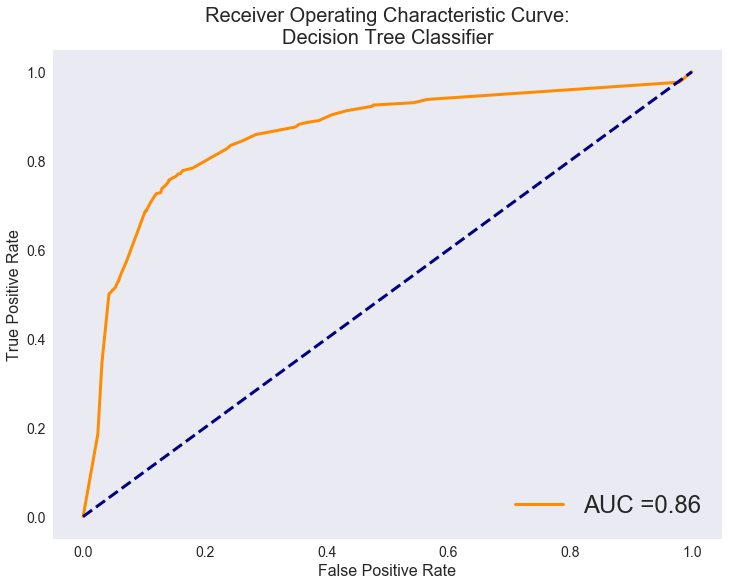

In [80]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn =clf_dt.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

dt_model_object={}
dt_model_object['fpr']=fpr
dt_model_object['tpr']=tpr
dt_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nDecision Tree Classifier')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

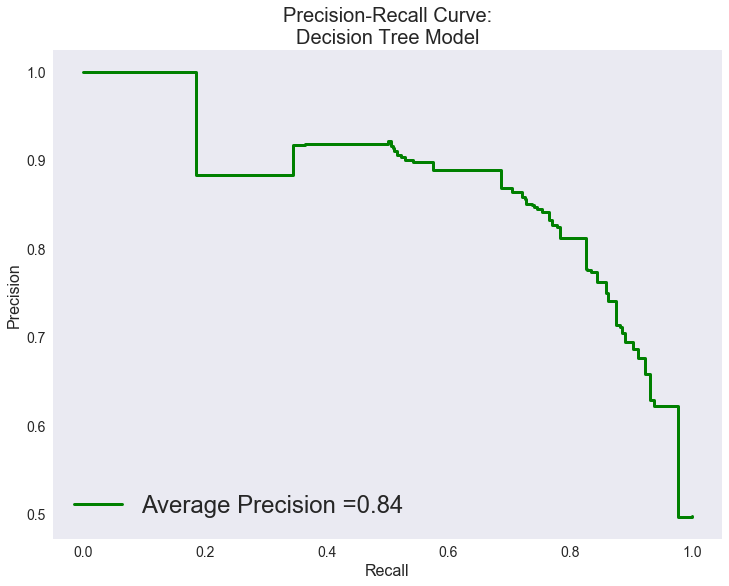

In [81]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

y_pred_proba_dt =clf_dt.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dt)
average_precision = average_precision_score(y_test, y_pred_proba_dt)

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)
dt_model_object['recall']=recall
dt_model_object['precision']=precision
dt_model_object['average_precision']=average_precision

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nDecision Tree Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

### Applying KNN model and tuning hyper-parameter

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

X = model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=0)
    
neigh = KNeighborsClassifier()

k = np.arange(20)+1
param_grid = {'n_neighbors': k}
                                  
CLF = GridSearchCV(estimator = neigh, param_grid = param_grid, cv = 5)
CLF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [83]:
CLF.best_params_

{'n_neighbors': 8}

In [84]:
neigh = KNeighborsClassifier(n_neighbors = CLF.best_params_['n_neighbors'])
neigh.fit(X_train,y_train)
ypred = neigh.predict(X_test)
ypred_knn_model=neigh.predict(X_test)
accuracy_score(ypred,y_test)*100

70.630468925286067

In [85]:
comfusion_matrix_properties(mat)

Confusion Matrix:

 [[1783  455]
 [ 854 1365]] 

True Positive Rate 67.61 %
True Negative Rate 75.0 %
Positive Predictive Value 79.67 %
Negative Predictive Value 61.51 %
False Positive Rate 25.0 %
False Negative Rate 32.39 %
False Discovery Rate 20.33 %
Overall Accuracy 70.63 %


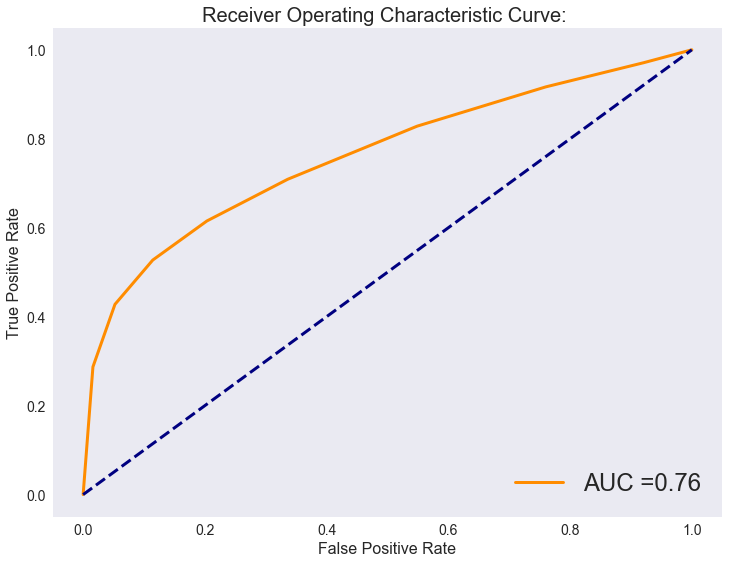

In [86]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_knn = neigh.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)

knn_model_object={}
knn_model_object['fpr']=fpr
knn_model_object['tpr']=tpr
knn_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve: ')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

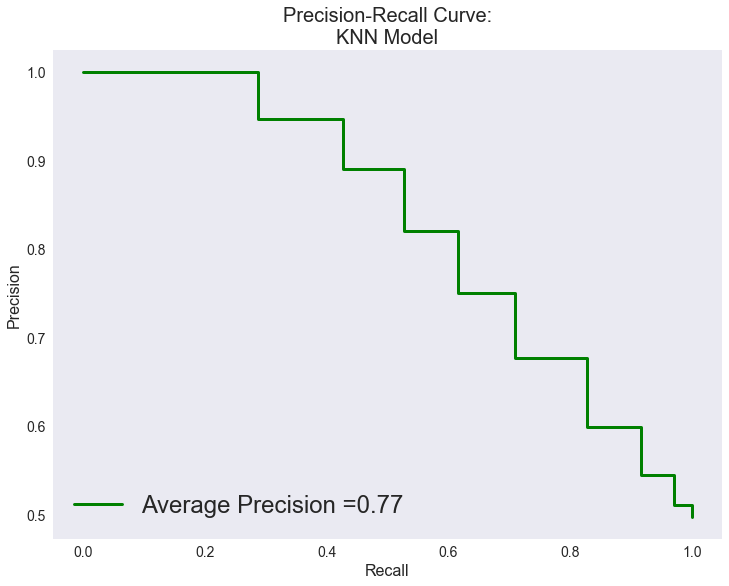

In [87]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

y_pred_proba_knn = neigh.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_knn)
average_precision = average_precision_score(y_test, y_pred_proba_knn)

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)
knn_model_object['recall']=recall
knn_model_object['precision']=precision
knn_model_object['average_precision']=average_precision

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nKNN Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

### Here, we use a random Forest Classifier, which generally tends to perform better than a Decision Tree Classfifier 

In [88]:
from sklearn.ensemble import RandomForestClassifier
print("RANDOM FOREST CLASSIFIER")

rfc = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=0)

rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
ypred_rfc_model=rfc.predict(X_test)
print("Prediction Accuracy:",round(accuracy_score(ypred,y_test)*100,2),"%")


mat = confusion_matrix(y_test,ypred)

print(comfusion_matrix_properties(mat))
print()

print("Feature importances:")
print(rfc.feature_importances_)


RANDOM FOREST CLASSIFIER
Prediction Accuracy: 82.72 %
Confusion Matrix:

 [[1971  267]
 [ 503 1716]] 

True Positive Rate 79.67 %
True Negative Rate 86.54 %
Positive Predictive Value 88.07 %
Negative Predictive Value 77.33 %
False Positive Rate 13.46 %
False Negative Rate 20.33 %
False Discovery Rate 11.93 %
Overall Accuracy 82.72 %
None

Feature importances:
[ 0.01163178  0.02434754  0.01194397  0.22001535  0.06953497  0.02336239
  0.00452929  0.04569872  0.03073299  0.02750748  0.          0.          0.
  0.00154069  0.11507542  0.15528416  0.07676895  0.04938332  0.13264299]


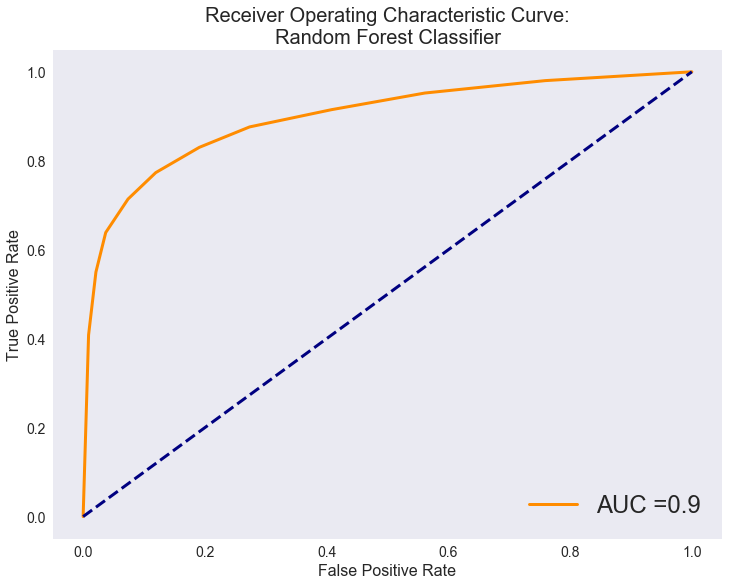

In [89]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)
#plt.set_facecolor('xkcd:white')
plt.figure(figsize=(12,9))
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
variable2=y_pred_proba_knn

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)

rfc_model_object={}
rfc_model_object['fpr']=fpr
rfc_model_object['tpr']=tpr
rfc_model_object['auc']=auc

plt.plot(fpr,tpr,label="AUC ="+str(round(auc,2)), lw=3,color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve:\nRandom Forest Classifier')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

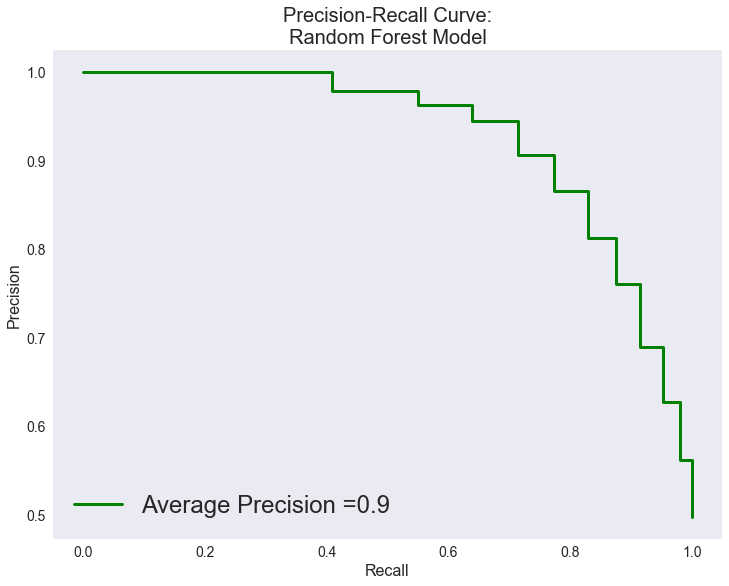

In [90]:
large = 24

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))

y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rfc)
average_precision = average_precision_score(y_test, y_pred_proba_rfc)

plt.step(recall, precision, color='green',label="Average Precision ="+str(round(average_precision,2)),lw=3)
rfc_model_object['recall']=recall
rfc_model_object['precision']=precision
rfc_model_object['average_precision']=average_precision

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve:\nRandom Forest Model')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

### Feature Importances for classifier

In [91]:
for i in range(len(rfc.feature_importances_)):
    print(X_train.columns[i],rfc.feature_importances_[i])

has_hashtags 0.0116317798525
num_hashtags 0.0243475350131
has_media 0.0119439692173
user_favourites_count 0.220015351681
has_urls 0.0695349705335
has_favorite_count 0.0233623913377
has_place 0.00452928542228
has_retweet_count 0.0456987200571
is_RT 0.0307329914193
has_user_description 0.0275074776492
has_user_followers_count 0.0
has_user_listed_count 0.0
has_user_name 0.0
is_user_verfied 0.00154069017654
f_ratio 0.115075415204
length 0.155284157717
DIGITS 0.0767689544992
CAP 0.0493833176455
user_listed_count 0.132642992574


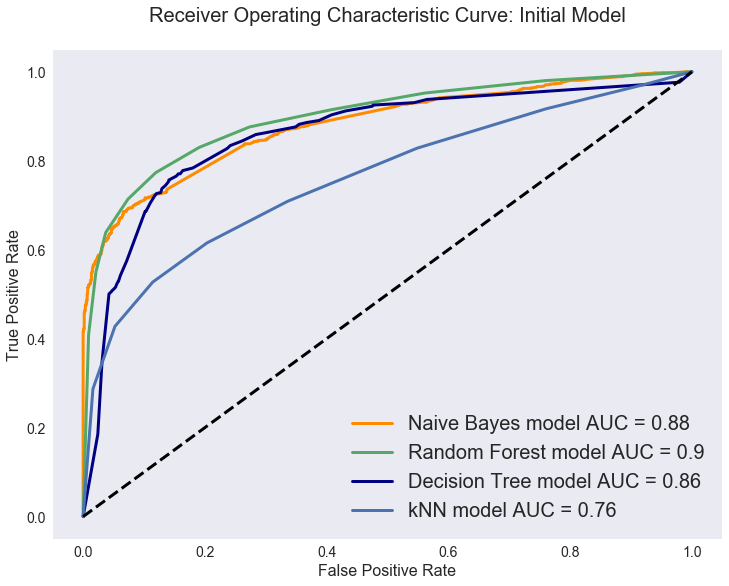

In [92]:
large = 20

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))


plt.plot(naive_bayes_model_object['fpr'],naive_bayes_model_object['tpr'],label="Naive Bayes model AUC = "+str(round(naive_bayes_model_object['auc'],2)), lw=3,color='darkorange')

plt.plot(rfc_model_object['fpr'],rfc_model_object['tpr'],label="Random Forest model AUC = "+str(round(rfc_model_object['auc'],2)), lw=3,color='g')



plt.plot(dt_model_object['fpr'],dt_model_object['tpr'],label="Decision Tree model AUC = "+str(round(dt_model_object['auc'],2)), lw=3,color='navy')
plt.plot(knn_model_object['fpr'],knn_model_object['tpr'],label="kNN model AUC = "+str(round(knn_model_object['auc'],2)), lw=3,color='b')


plt.plot([0, 1], [0, 1], color='black', lw=3, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve: Initial Model\n')
plt.legend(loc="lower right")
plt.grid("off")
plt.show()

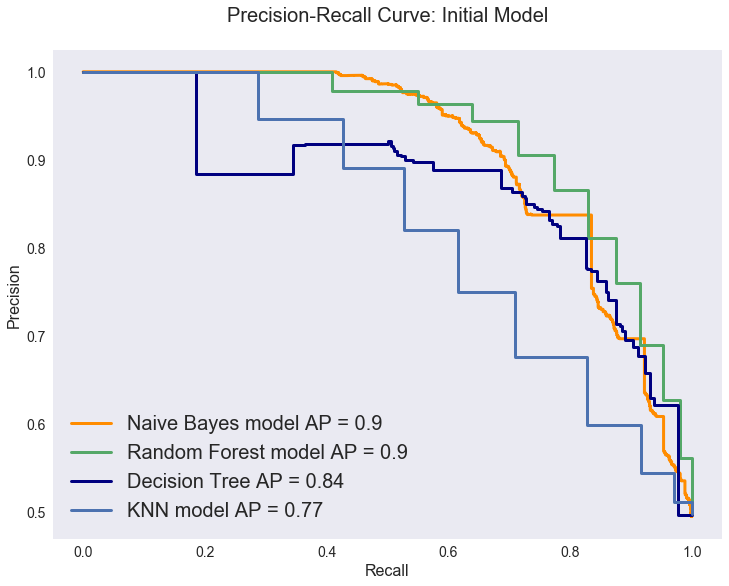

In [93]:
large = 20

plt.rc('legend',fontsize=large)
plt.rc('axes',titlesize = 20)
plt.rc('axes',labelsize = 16)
plt.rc('xtick',labelsize = 14)
plt.rc('ytick',labelsize = 14)

plt.figure(figsize=(12,9))



plt.step(naive_bayes_model_object['recall'], naive_bayes_model_object['precision'], color='darkorange',label="Naive Bayes model AP = "+str(round(naive_bayes_model_object['average_precision'],2)),lw=3)
plt.step(rfc_model_object['recall'], rfc_model_object['precision'], color='g',label="Random Forest model AP = "+str(round(rfc_model_object['average_precision'],2)),lw=3)
plt.step(dt_model_object['recall'], dt_model_object['precision'], color='navy',label="Decision Tree AP = "+str(round(dt_model_object['average_precision'],2)),lw=3)
plt.step(knn_model_object['recall'], knn_model_object['precision'], color='b',label="KNN model AP = "+str(round(knn_model_object['average_precision'],2)),lw=3)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Initial Model\n')
plt.legend(loc="lower left")
plt.grid("off")
plt.show()

In conclusion, Naive bayes model gives better performance in terms of false positive rate among the considered models.